<a href="https://colab.research.google.com/github/revathys/Bank-Marketing/blob/main/prompt_III.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import time
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC

In [2]:
df = pd.read_csv('data/bank-additional/bank-additional-full.csv', sep = ';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
# find number of null fields
df.isna().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [7]:
#find unique value counts for categorical values
categorical_columns = df.select_dtypes(include=['object']).columns
print("Categorical features with unique values")
df.select_dtypes(include=['object']).nunique().sort_values(ascending=False)

Categorical features with unique values


,0
job,12
month,10
education,8
day_of_week,5
marital,4
default,3
housing,3
poutcome,3
loan,3
contact,2


In [8]:
# Identify numeric and categorical columns

X = df.drop('y', axis=1)
y = df['y'].map({'yes': 1, 'no': 0})
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns
#Find no of values with unknown for catagorical fields
summary = {}

for col in categorical_features:
    unknown_count = (df[col] == 'unknown').sum()
    unique_values = df[col].unique().tolist()
    summary[col] = {
        'unknown_count': unknown_count,
        'unique_values': unique_values
    }
summary_df = pd.DataFrame(summary).T
summary_df

,unknown_count,unique_values
job,330,"[housemaid, services, admin., blue-collar, tec..."
marital,80,"[married, single, divorced, unknown]"
education,1731,"[basic.4y, high.school, basic.6y, basic.9y, pr..."
default,8597,"[no, unknown, yes]"
housing,990,"[no, yes, unknown]"
loan,990,"[no, yes, unknown]"
contact,0,"[telephone, cellular]"
month,0,"[may, jun, jul, aug, oct, nov, dec, mar, apr, ..."
day_of_week,0,"[mon, tue, wed, thu, fri]"
poutcome,0,"[nonexistent, failure, success]"


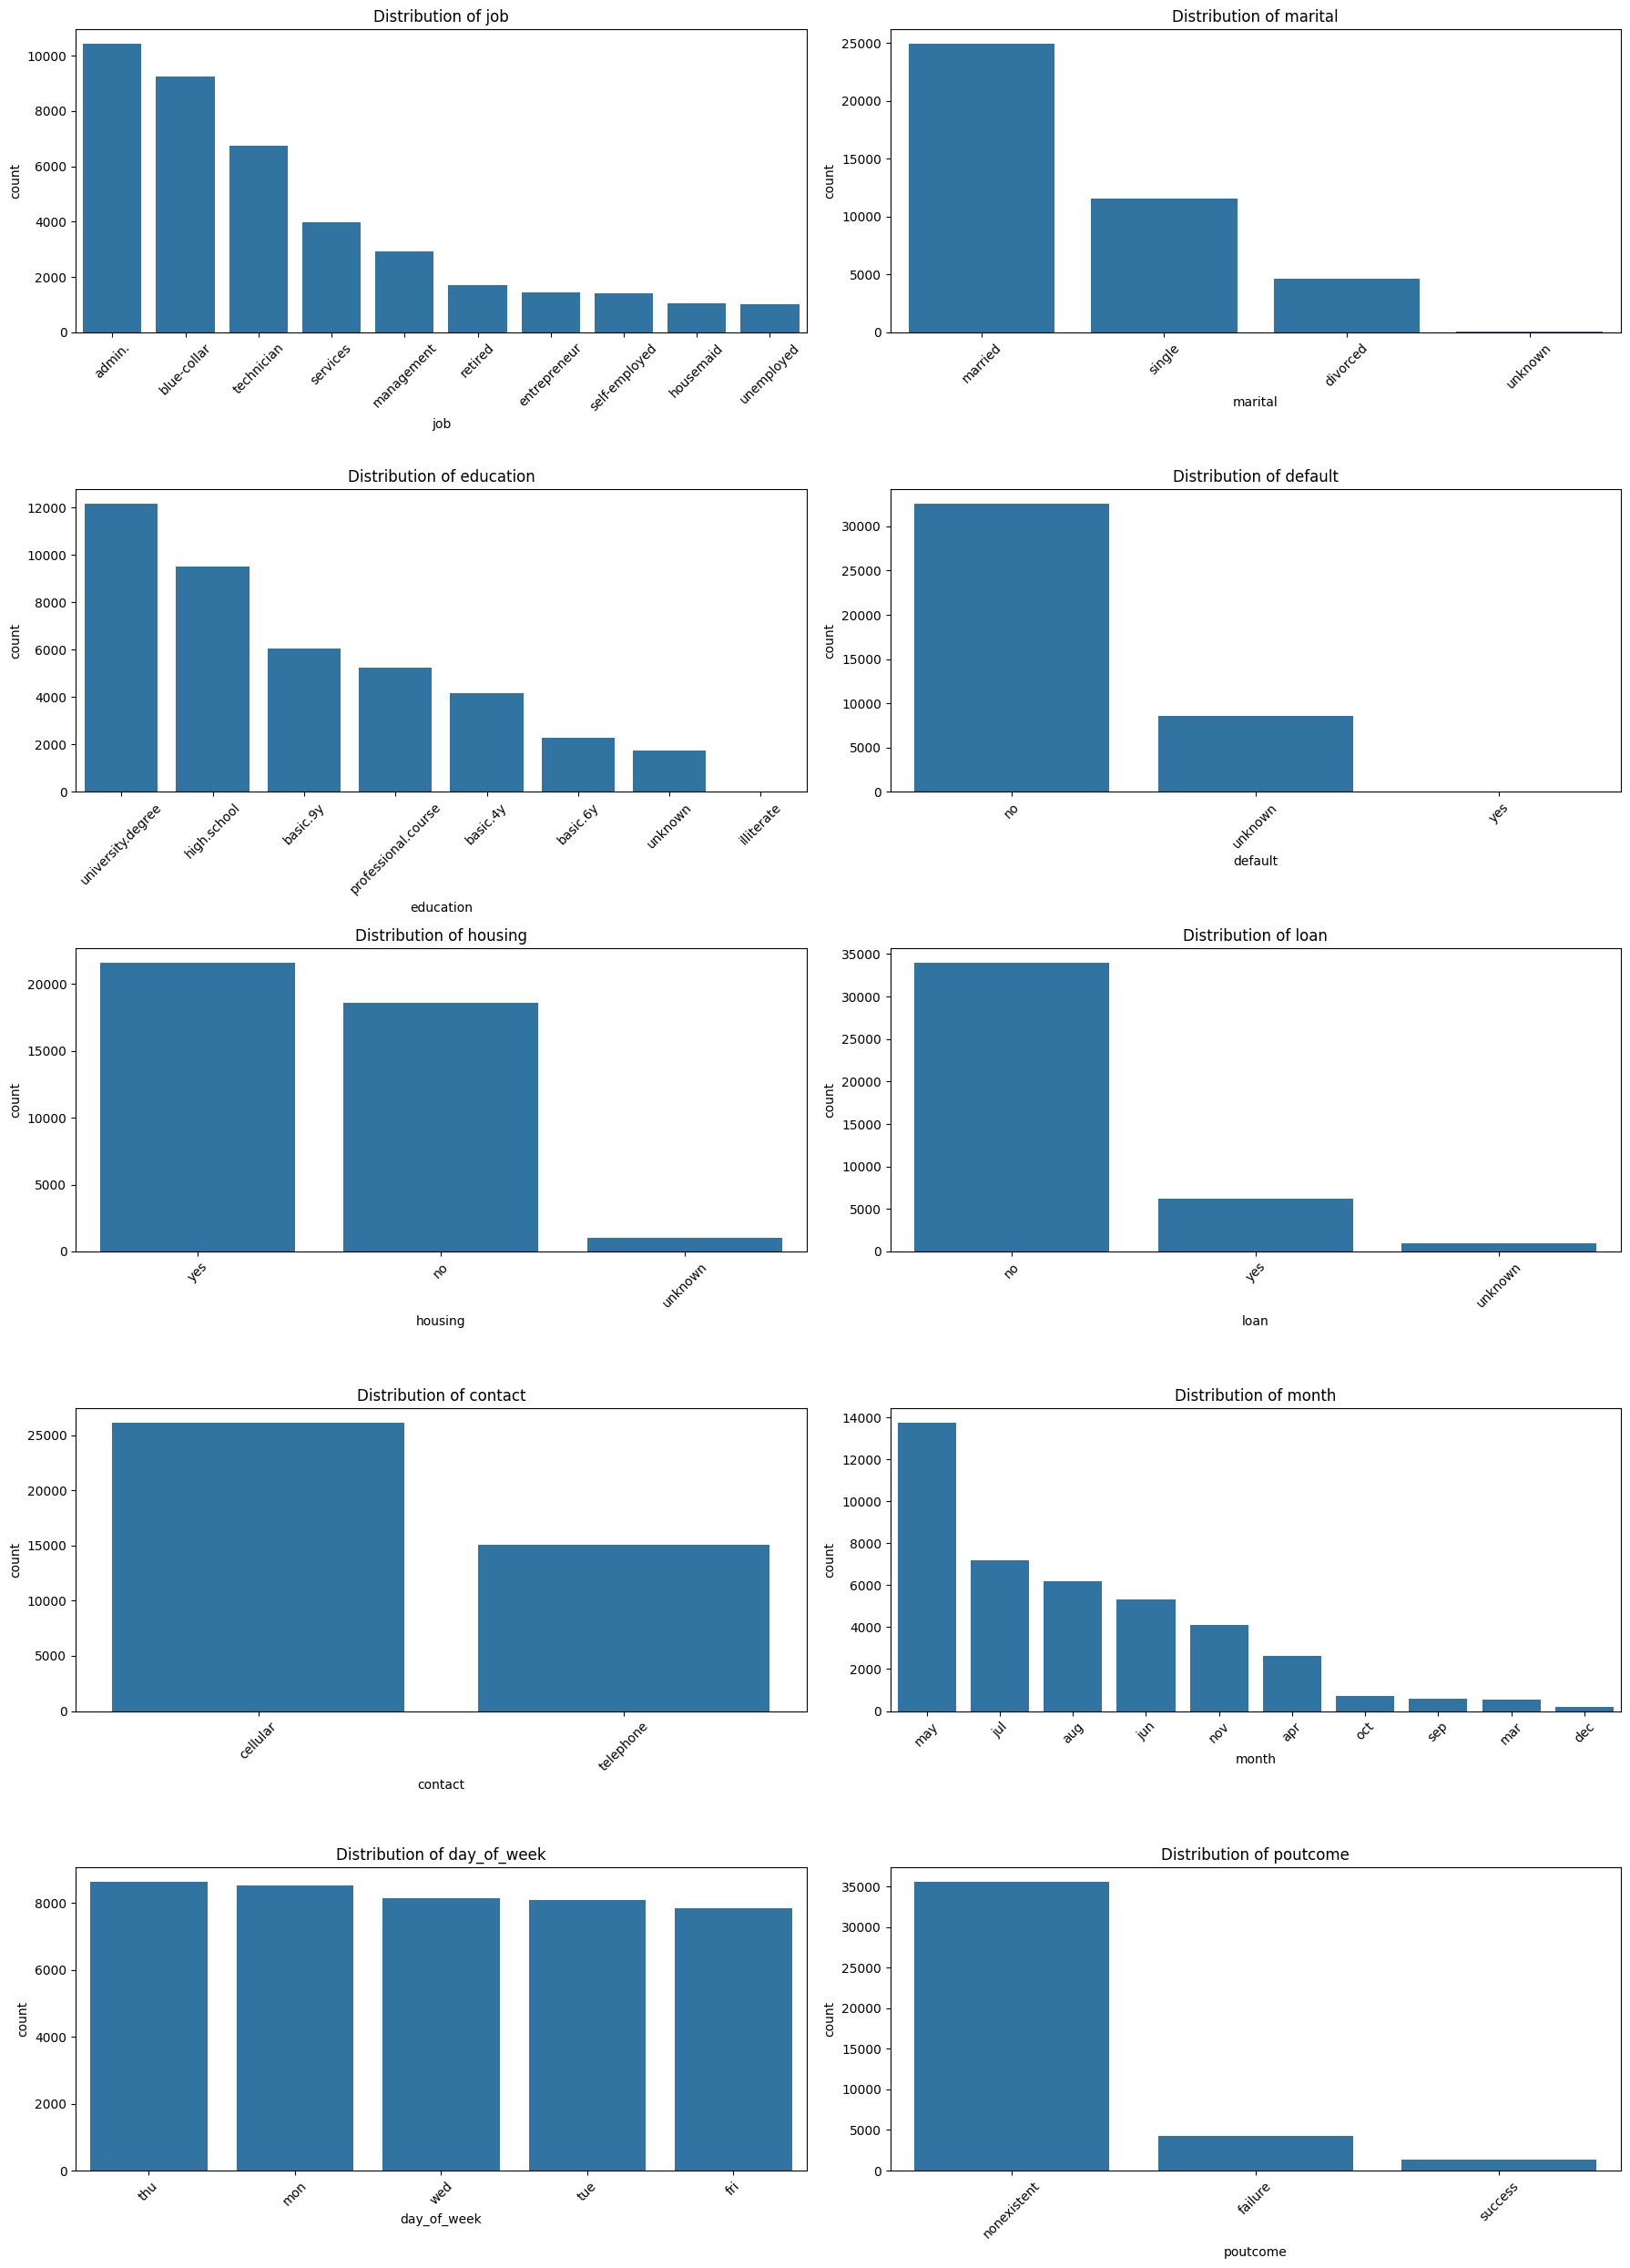

In [9]:
#plot count distribution of categorical values
n_cols = 2
n_rows = (len(categorical_features) + n_cols - 1) // n_cols  # ceiling division

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, 5*n_rows))

axes = axes.flatten()  # make 2D array of axes into 1D for easy looping

for i, col in enumerate(categorical_features):
    sns.countplot(x=col, data=df, ax=axes[i], order=df[col].value_counts().index[:10])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

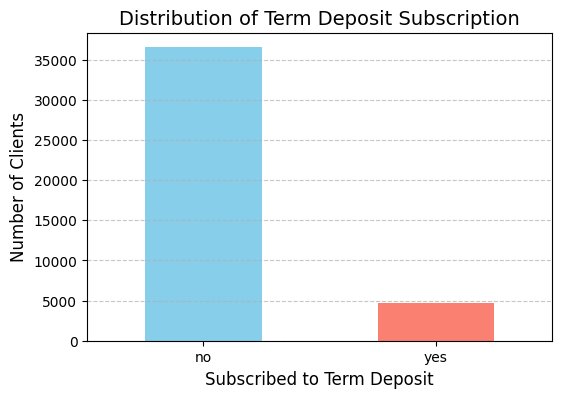

In [10]:
#plot distribution of success

plt.figure(figsize=(6,4))
df['y'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])

plt.title('Distribution of Term Deposit Subscription', fontsize=14)
plt.xlabel('Subscribed to Term Deposit', fontsize=12)
plt.ylabel('Number of Clients', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

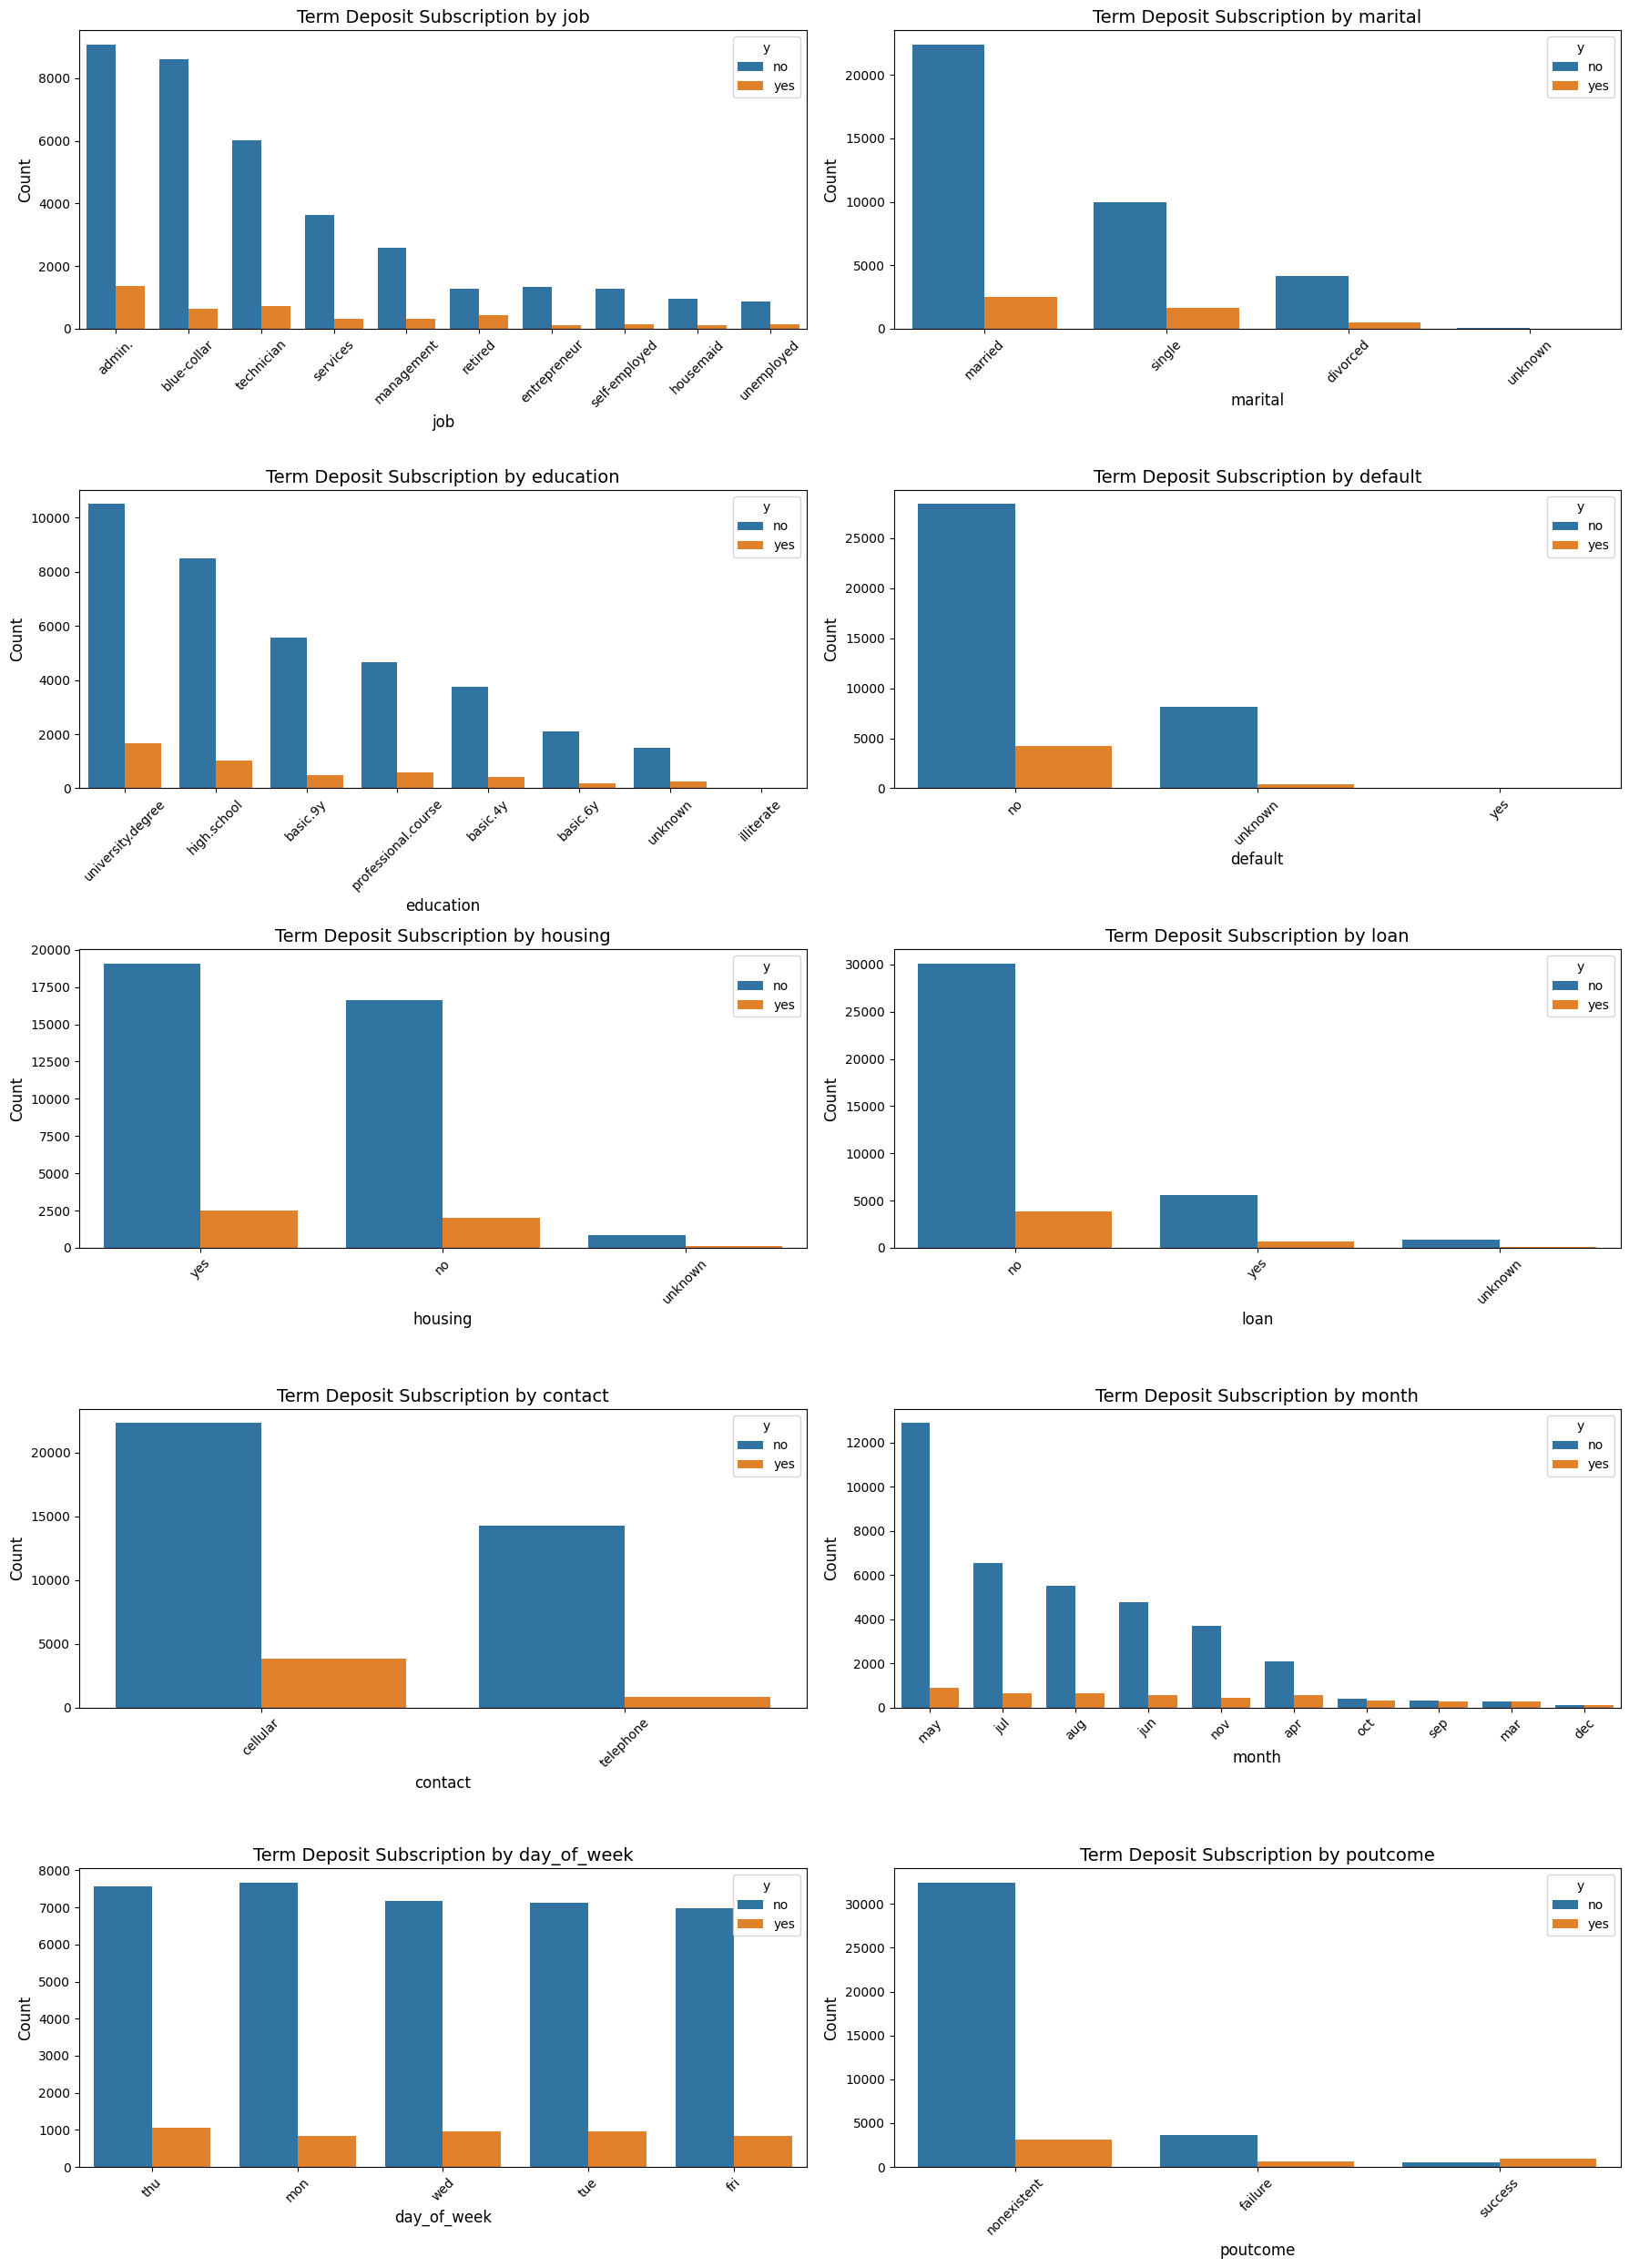

In [11]:
#plot y vs categorical features
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, 5*n_rows))
axes = axes.flatten()

# Loop through categorical columns
for i, col in enumerate(categorical_features):
    sns.countplot(data=df, x=col, hue='y', ax=axes[i],
                  order=df[col].value_counts().index[:10])  # top 10 categories
    axes[i].set_title(f"Term Deposit Subscription by {col}", fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Count", fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)

# Remove unused subplots if any
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [12]:

# Create a transformer for numeric and catagorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])



### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [13]:
# Split data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [14]:
# Check class distribution
baseline = df['y'].value_counts(normalize = True)
print("Class distribution:")
print(baseline)

# Compute baseline accuracy
baseline_accuracy = baseline.max()
print(f"\nBaseline Accuracy (majority class): {baseline_accuracy:.3f}")

Class distribution:
y
no     0.887346
yes    0.112654
Name: proportion, dtype: float64

Baseline Accuracy (majority class): 0.887


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [15]:
lr_pipeline = Pipeline([('preprocessor', preprocessor),('logreg',LogisticRegression(max_iter = 1000))])

In [16]:
lr_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object'))])),
                ('logreg', LogisticRegression(max_iter=1000))])

### Problem 9: Score the Model

What is the accuracy of your model?

In [17]:
y_pred = lr_pipeline.predict(X_test)
# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

Accuracy: 0.9112648701141054

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7303
           1       0.67      0.43      0.52       935

    accuracy                           0.91      8238
   macro avg       0.80      0.70      0.74      8238
weighted avg       0.90      0.91      0.90      8238


Confusion Matrix:
[[7104  199]
 [ 532  403]]


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [18]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC()
}

# Train, time, and evaluate
results = []

for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model)])

    start = time.time()
    pipeline.fit(X_train, y_train)
    end = time.time()
    train_time = end - start

    # Accuracy
    train_acc = pipeline.score(X_train, y_train)
    test_acc = pipeline.score(X_test, y_test)

    results.append({
        'Model': name,
        'Train Time (s)': round(train_time, 3),
        'Train Accuracy': round(train_acc, 3),
        'Test Accuracy': round(test_acc, 3)
    })

# Display results
results_df = pd.DataFrame(results)
results_df

,Model,Train Time (s),Train Accuracy,Test Accuracy
0,Logistic Regression,0.839,0.912,0.911
1,KNN,0.168,0.928,0.901
2,Decision Tree,0.509,1.000,0.887
3,SVM,30.570,0.923,0.912


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.


- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [19]:
# Reuse the preprocessor
def run_grid_search(model, param_grid, model_name):
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model)])

    grid = GridSearchCV(
        pipeline,
        param_grid=param_grid,
        scoring='recall',
        cv=5,
        n_jobs=-1
    )

    start = time.time()
    grid.fit(X_train, y_train)
    end = time.time()

    print(f"Model: {model_name}")
    print(f"Best Params: {grid.best_params_}")
    print(f"Best CV Recall: {grid.best_score_:.3f}")
    print(f"Train Time: {end - start:.2f}s")

    # Evaluate on test data
    y_pred = grid.predict(X_test)
    print("\nTest Classification Report:")
    print(classification_report(y_test, y_pred))
    print("-"*60)

    return grid

In [20]:
#Logistic regression
log_params = {
    'classifier__C': [0.01, 0.1, 1, 10],
    'classifier__penalty': ['l2'],
    'classifier__class_weight': [None, 'balanced']
}

best_log = run_grid_search(LogisticRegression(max_iter=1000), log_params, "Logistic Regression")

Model: Logistic Regression
Best Params: {'classifier__C': 10, 'classifier__class_weight': 'balanced', 'classifier__penalty': 'l2'}
Best CV Recall: 0.883
Train Time: 19.28s

Test Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.86      0.92      7303
           1       0.45      0.89      0.59       935

    accuracy                           0.86      8238
   macro avg       0.72      0.88      0.76      8238
weighted avg       0.92      0.86      0.88      8238

------------------------------------------------------------


In [21]:
#knn
knn_params = {
    'classifier__n_neighbors': [3, 5, 7, 9, 11],
    'classifier__weights': ['uniform', 'distance']
}

best_knn = run_grid_search(KNeighborsClassifier(), knn_params, "KNN")

Model: KNN
Best Params: {'classifier__n_neighbors': 3, 'classifier__weights': 'distance'}
Best CV Recall: 0.426
Train Time: 92.40s

Test Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      7303
           1       0.54      0.44      0.49       935

    accuracy                           0.89      8238
   macro avg       0.73      0.70      0.71      8238
weighted avg       0.89      0.89      0.89      8238

------------------------------------------------------------


In [22]:
#Decision Tree
dt_params = {
    'classifier__max_depth': [3, 5, 10, 20, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__class_weight': [None, 'balanced']
}

best_dt = run_grid_search(DecisionTreeClassifier(random_state=42), dt_params, "Decision Tree")

Model: Decision Tree
Best Params: {'classifier__class_weight': 'balanced', 'classifier__max_depth': 5, 'classifier__min_samples_split': 2}
Best CV Recall: 0.912
Train Time: 52.12s

Test Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.82      0.90      7303
           1       0.40      0.93      0.56       935

    accuracy                           0.83      8238
   macro avg       0.69      0.87      0.73      8238
weighted avg       0.92      0.83      0.86      8238

------------------------------------------------------------


In [26]:
#svm
svm_params = {
    'classifier__C': [0.01, 0.1, 1, 10],
    'classifier__class_weight': [None, 'balanced']
}

best_svm = run_grid_search(LinearSVC(), svm_params, "SVM")

Model: SVM
Best Params: {'classifier__C': 10, 'classifier__class_weight': 'balanced'}
Best CV Recall: 0.879
Train Time: 17.33s

Test Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.85      0.91      7303
           1       0.44      0.88      0.58       935

    accuracy                           0.86      8238
   macro avg       0.71      0.87      0.75      8238
weighted avg       0.92      0.86      0.88      8238

------------------------------------------------------------


In [28]:
results = {
    'Model': ['Logistic Regression', 'KNN', 'Decision Tree', 'SVM'],
    'Best Recall (CV)': [best_log.best_score_,
                     best_knn.best_score_,
                     best_dt.best_score_,
                     best_svm.best_score_]
}

results_df = pd.DataFrame(results)
results_df

,Model,Best Recall (CV)
0,Logistic Regression,0.882591
1,KNN,0.426181
2,Decision Tree,0.912011
3,SVM,0.879082


In [42]:
 #Define models and their hyperparameter grids
models_and_params = {
    "Logistic Regression": (
        LogisticRegression(max_iter=1000, random_state=42),
        {'classifier__C': [0.01, 0.1, 1, 10], 'classifier__penalty': ['l2']}
    ),
    "KNN": (
        KNeighborsClassifier(),
        {'classifier__n_neighbors': [3, 5, 7, 9]}
    ),
    "Decision Tree": (
        DecisionTreeClassifier(random_state=42),
        {'classifier__max_depth': [3, 5, 10, None],
         'classifier__min_samples_split': [2, 5, 10]}
    ),
    "Linear SVM": (
        LinearSVC(max_iter=3000, random_state=42),
        {'classifier__C': [0.1, 1, 10],
         'classifier__class_weight': [None, 'balanced']}
    )
}

results = []

# Loop through each model and perform grid search
for name, (model, params) in models_and_params.items():
    print(f"🔍 Tuning {name}...")
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model)])

    grid = GridSearchCV(
        estimator=pipeline,
        param_grid=params,
        cv=5,
        n_jobs=-1,
        scoring='recall_macro'
    )

    start = time.time()
    grid.fit(X_train, y_train)
    end = time.time()

    best_model = grid.best_estimator_
    y_pred_train = best_model.predict(X_train)
    y_pred_test = best_model.predict(X_test)

    results.append({
        "Model": name,
        #"Best Params": grid.best_params_,
        "Train Time (s)": round(end - start, 2),
        "Train Accuracy": round(accuracy_score(y_train, y_pred_train), 3),
        "Test Accuracy": round(accuracy_score(y_test, y_pred_test), 3),
        "Recall" : round(recall_score(y_test, y_pred_test, average='macro'), 3)
    })




🔍 Tuning Logistic Regression...
🔍 Tuning KNN...
🔍 Tuning Decision Tree...
🔍 Tuning Linear SVM...


In [43]:

# Display results as DataFrame
results_df = pd.DataFrame(results)
pd.set_option('display.max_colwidth', None)
print(results_df)

                 Model  Train Time (s)  Train Accuracy  Test Accuracy  Recall
0  Logistic Regression            9.95           0.912          0.911   0.702
1                  KNN           36.76           0.941          0.896   0.696
2        Decision Tree           20.03           0.909          0.909   0.771
3           Linear SVM           14.19           0.860          0.857   0.868


##### Questions